In [1]:
# Parse data
import os
import yaml

data_folder = "nanomap_final"
trial_name = "drift_bias_01"
fullpath = os.path.join(os.getcwd(),data_folder,trial_name)

# Make plot

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


def crawl_dir_and_plot(fullpath):
    print fullpath
    modeled_data_actual = []
    modeled_data_modeled = []
    modeled_data_robustness = []

    unmodeled_data_actual = []
    unmodeled_data_modeled = []
    unmodeled_data_robustness = []
    
    def Plot():
        fig = plt.figure()
        ax = plt.gca()
        #ax.set_xscale('log')
        ax.scatter(unmodeled_data_actual, unmodeled_data_robustness, marker='x',label='unmodeled')
        ax.scatter(modeled_data_actual, modeled_data_robustness,marker='o',label='modeled', color='r')
        #axes.set_xlim([0,0.6])
        ax.set_ylim([0,3.5])
        plt.legend()

    def ParseMetadata(name):
        with open(name) as f:
            # use safe_load instead load
            metadata = yaml.safe_load(f)
        if metadata['min_range_to_obstacle'] > 10:    ## indicates faulty startup 
            return
        if metadata['tag'] == 'modeled':
            modeled_data_actual.append(metadata['drift_actual'])
            modeled_data_modeled.append(metadata['sigma_modeled'])
            modeled_data_robustness.append(metadata['min_range_to_obstacle'])
        if metadata['tag'] == 'unmodeled':
            unmodeled_data_actual.append(metadata['drift_actual'])
            unmodeled_data_modeled.append(metadata['sigma_modeled'])
            unmodeled_data_robustness.append(metadata['min_range_to_obstacle'])


    for root, dirs, files_list in os.walk(fullpath):
        for name in files_list:
             if name.startswith(("metadata")):
                    ParseMetadata(os.path.join(root,name))
                    
    print modeled_data_actual
    Plot()
              

/Users/pflomacpro/analysis-nanomap/nanomap_final/drift_bias_01
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]


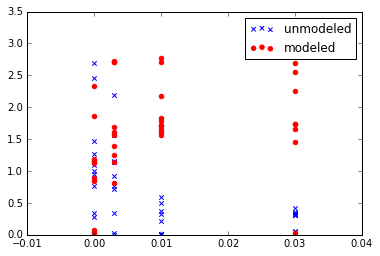

In [2]:
data_folder = "nanomap_final"
trial_name = "drift_bias_01"
fullpath = os.path.join(os.getcwd(),data_folder,trial_name)
crawl_dir_and_plot(fullpath)

/Users/pflomacpro/analysis-nanomap/nanomap_final/drift_imu_01
[1.0, 1.0, 0.5, 0.5, 0.1, 0.1, 0.05, 0.05]


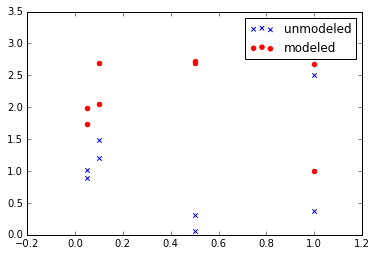

In [3]:
data_folder = "nanomap_final"
trial_name = "drift_imu_01"
fullpath = os.path.join(os.getcwd(),data_folder,trial_name)
crawl_dir_and_plot(fullpath)

/Users/pflomacpro/analysis-nanomap/nanomap_final/drift_imu_02
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]


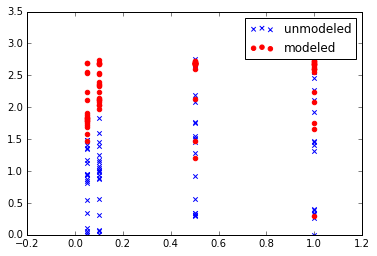

In [4]:
data_folder = "nanomap_final"
trial_name = "drift_imu_02"
fullpath = os.path.join(os.getcwd(),data_folder,trial_name)
crawl_dir_and_plot(fullpath)

/Users/pflomacpro/analysis-nanomap/nanomap_final/drift_imu_03_down_stret
[1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5]


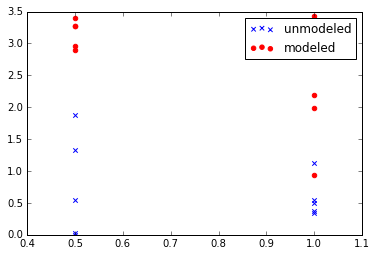

In [5]:
trial_name = "drift_imu_03_down_stret"
fullpath = os.path.join(os.getcwd(),data_folder,trial_name)
crawl_dir_and_plot(fullpath)

/Users/pflomacpro/analysis-nanomap/nanomap_final/down_street_1_30_pm_thursday
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


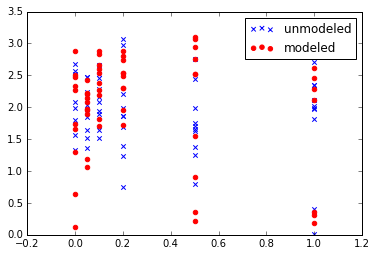

In [6]:
trial_name = "down_street_1_30_pm_thursday"
fullpath = os.path.join(os.getcwd(),data_folder,trial_name)
crawl_dir_and_plot(fullpath)

/Users/pflomacpro/analysis-nanomap/nanomap_final/wall_2_pm_thursday
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


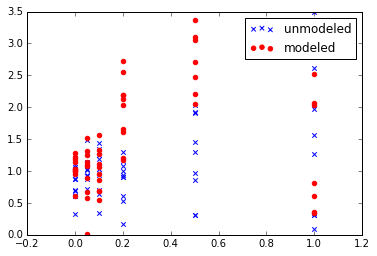

In [7]:
trial_name = "wall_2_pm_thursday"
fullpath = os.path.join(os.getcwd(),data_folder,trial_name)
crawl_dir_and_plot(fullpath)

/Users/pflomacpro/analysis-nanomap/nanomap_final/drift_wall_1000
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.

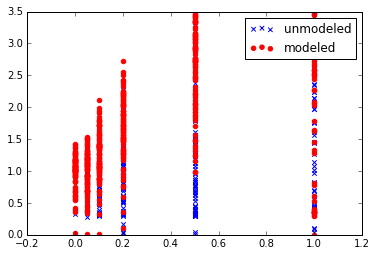

In [8]:
trial_name = "drift_wall_1000"
fullpath = os.path.join(os.getcwd(),data_folder,trial_name)
crawl_dir_and_plot(fullpath)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd

In [36]:
robust_columns = list(["min_obstacle_dist", "drift", "modeled"])
robust_df = pd.DataFrame(columns=robust_columns)

#latency_df_add = pd.DataFrame([words], columns=latency_columns)

modeled_crashed = dict()
modeled_total = dict()

unmodeled_crashed = dict()
unmodeled_total = dict()

def PandaMetadata(name):
    global robust_df
    with open(name) as f:
        # use safe_load instead load
        metadata = yaml.safe_load(f)
    if metadata['min_range_to_obstacle'] > 10:    ## indicates faulty startup 
        return
    words=[]
    words.append(metadata["min_range_to_obstacle"])
    drift = metadata["drift_actual"]
    words.append(drift)
    if drift not in modeled_total:
        modeled_total[drift] = 0
        modeled_crashed[drift] = 0
    if drift not in unmodeled_total:
        unmodeled_total[drift] = 0
        unmodeled_crashed[drift] = 0
    if metadata['tag'] == 'modeled':
        words.append(1)
        modeled_total[drift] += 1
        if metadata["min_range_to_obstacle"] < 0.4:
            modeled_crashed[drift] += 1
    if metadata['tag'] == 'unmodeled':
        words.append(0)
        unmodeled_total[drift] += 1
        if metadata["min_range_to_obstacle"] < 0.4:
            unmodeled_crashed[drift] += 1
    robust_df_add = pd.DataFrame([words], columns=robust_columns)
    robust_df = robust_df.append(robust_df_add, ignore_index=True)

trial_name = "drift_wall_1000"
fullpath = os.path.join(os.getcwd(),data_folder,trial_name)
        
for root, dirs, files_list in os.walk(fullpath):
    for name in files_list:
         if name.startswith(("metadata")):
                PandaMetadata(os.path.join(root,name))

In [35]:
print modeled_crashed
print modeled_total

for k in modeled_crashed:
    print k, float(modeled_crashed[k])/modeled_total[k]

{0.0: 3, 0.5: 0, 0.1: 2, 0.2: 2, 1.0: 12, 0.05: 4}
{0.0: 90, 0.5: 149, 0.1: 90, 0.2: 90, 1.0: 111, 0.05: 88}
0.0 0.0333333333333
0.5 0.0
0.1 0.0222222222222
0.2 0.0222222222222
1.0 0.108108108108
0.05 0.0454545454545


In [37]:
print unmodeled_crashed
print unmodeled_total

for k in unmodeled_crashed:
    print k, float(unmodeled_crashed[k])/unmodeled_total[k]

{0.0: 1, 0.5: 25, 0.1: 9, 0.2: 9, 1.0: 26, 0.05: 2}
{0.0: 16, 0.5: 90, 0.1: 111, 0.2: 90, 1.0: 88, 0.05: 106}
0.0 0.0625
0.5 0.277777777778
0.1 0.0810810810811
0.2 0.1
1.0 0.295454545455
0.05 0.0188679245283


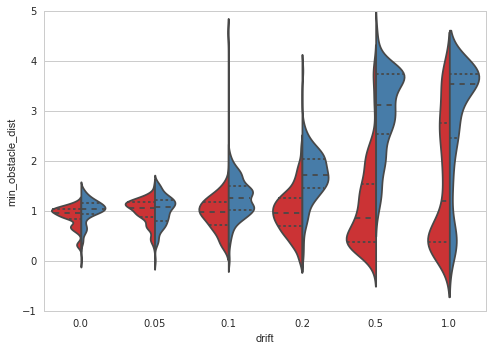

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(7,5))
ax = sns.violinplot(x="drift", palette="Set1", y="min_obstacle_dist", inner ='quartile', hue="modeled", data=robust_df, split=True, bw=0.3)
#axes.set_xlim([0,0.6])
ax.set_ylim([-1,5])
plt.tight_layout()
ax.legend_.remove()
#plt.savefig('robustness_violin.pdf')

In [38]:
jump_columns = list(["min_obstacle_dist", "jump_size", "use_corrections"])
jump_df = pd.DataFrame(columns=robust_columns)

#latency_df_add = pd.DataFrame([words], columns=latency_columns)

modeled_crashed = dict()
modeled_total = dict()

unmodeled_crashed = dict()
unmodeled_total = dict()

def PandaMetadata(name):
    global jump_df
    with open(name) as f:
        # use safe_load instead load
        metadata = yaml.safe_load(f)
    if 'min_range_to_obstacle' not in metadata:
        return
    if metadata['min_range_to_obstacle'] > 5:    ## indicates faulty startup 
        return
    words=[]
    words.append(metadata["min_range_to_obstacle"])
    words.append(metadata["jump_size"])
    drift = metadata["jump_size"]
    if drift not in modeled_total:
        modeled_total[drift] = 0
        modeled_crashed[drift] = 0
    if drift not in unmodeled_total:
        unmodeled_total[drift] = 0
        unmodeled_crashed[drift] = 0
    if metadata['tag'] == 'use_corrections':
        words.append(1)
        modeled_total[drift] += 1
        if metadata["min_range_to_obstacle"] < 0.4:
            modeled_crashed[drift] += 1
    if metadata['tag'] == 'ignore_corrections':
        words.append(0)
    jump_df_add = pd.DataFrame([words], columns=jump_columns)
    jump_df = jump_df.append(jump_df_add, ignore_index=True)

trial_name = "jump_1000"
fullpath = os.path.join(os.getcwd(),data_folder,trial_name)
        
for root, dirs, files_list in os.walk(fullpath):
    for name in files_list:
         if name.startswith(("metadata")):
                PandaMetadata(os.path.join(root,name))

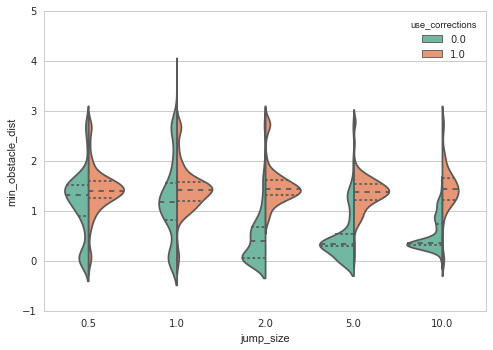

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize=(7,5))
ax = sns.violinplot(x="jump_size", palette="Set2", y="min_obstacle_dist", inner ='quartile', hue="use_corrections", data=jump_df, split=True, bw=0.3)
ax.set_ylim([-1,5])
plt.tight_layout()
plt.savefig('jump_violin.pdf')